In [1]:
%matplotlib notebook
import sys
sys.path.append("/opt/LFRCOMPLIANCE/")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pds
from glob import glob
from IPython.display import display
from lfrcompliance.test_engine.testcontext import *
from lfrcompliance.test_engine.result_loader import *
from lfrcompliance.tcpackets.constants import *
from lfrcompliance.test_engine.tests.analysis import TF
import multiprocessing.dummy
from dateutil import parser

In [2]:
res=ResultLoader(tm_files=["/home/jeandet/Documents/DATA/LFR_Packets/2017_03_02_14_21_53_packet_log.data",
                      "/home/jeandet/Documents/DATA/LFR_Packets/2017_03_02_14_21_54_packet_record.data"])
res.decomutePackets()
res.loadSWF()

In [3]:
res.SWFCount()

190

# Snapshots at F0 for cold and ambient cases

<IPython.core.display.Javascript object>


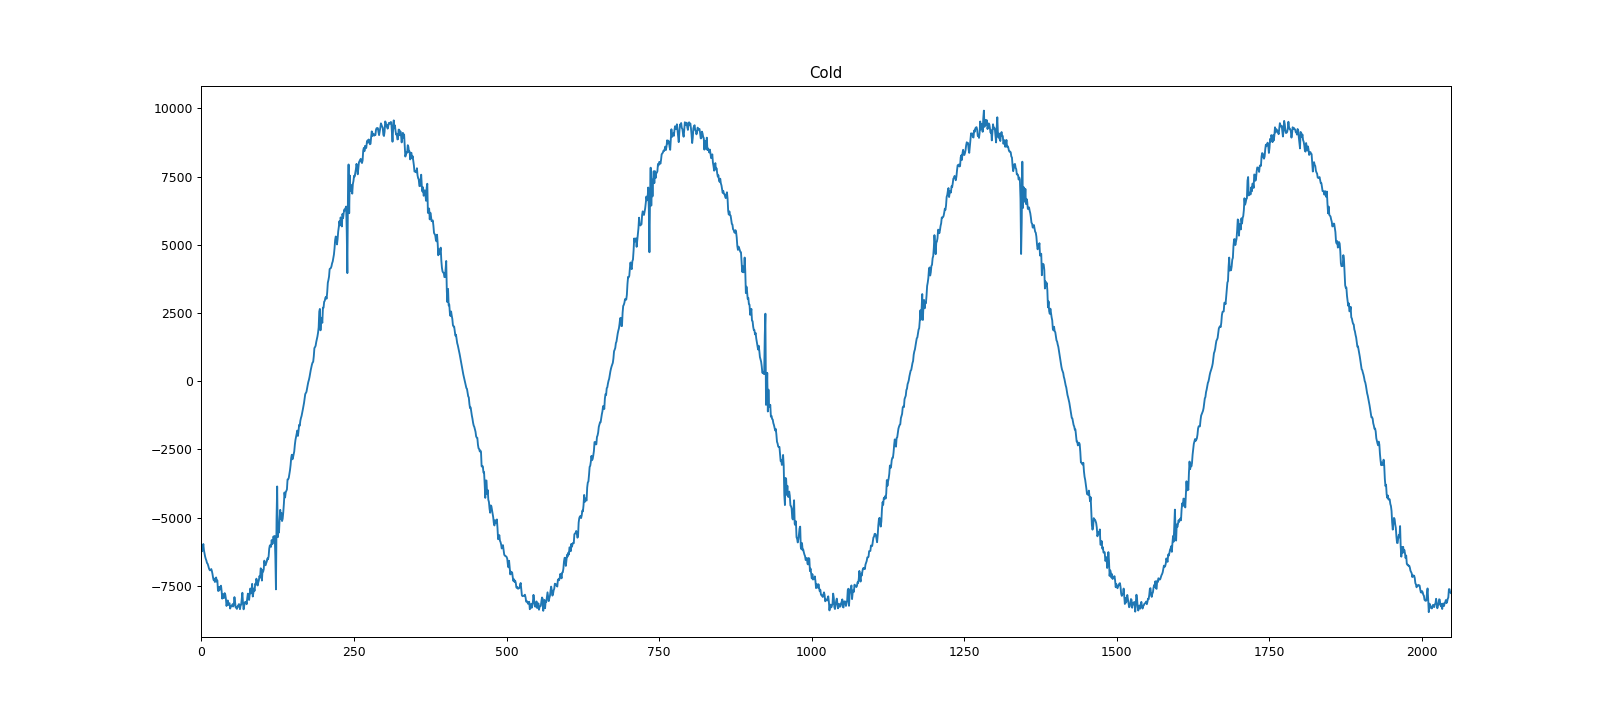

<IPython.core.display.Javascript object>


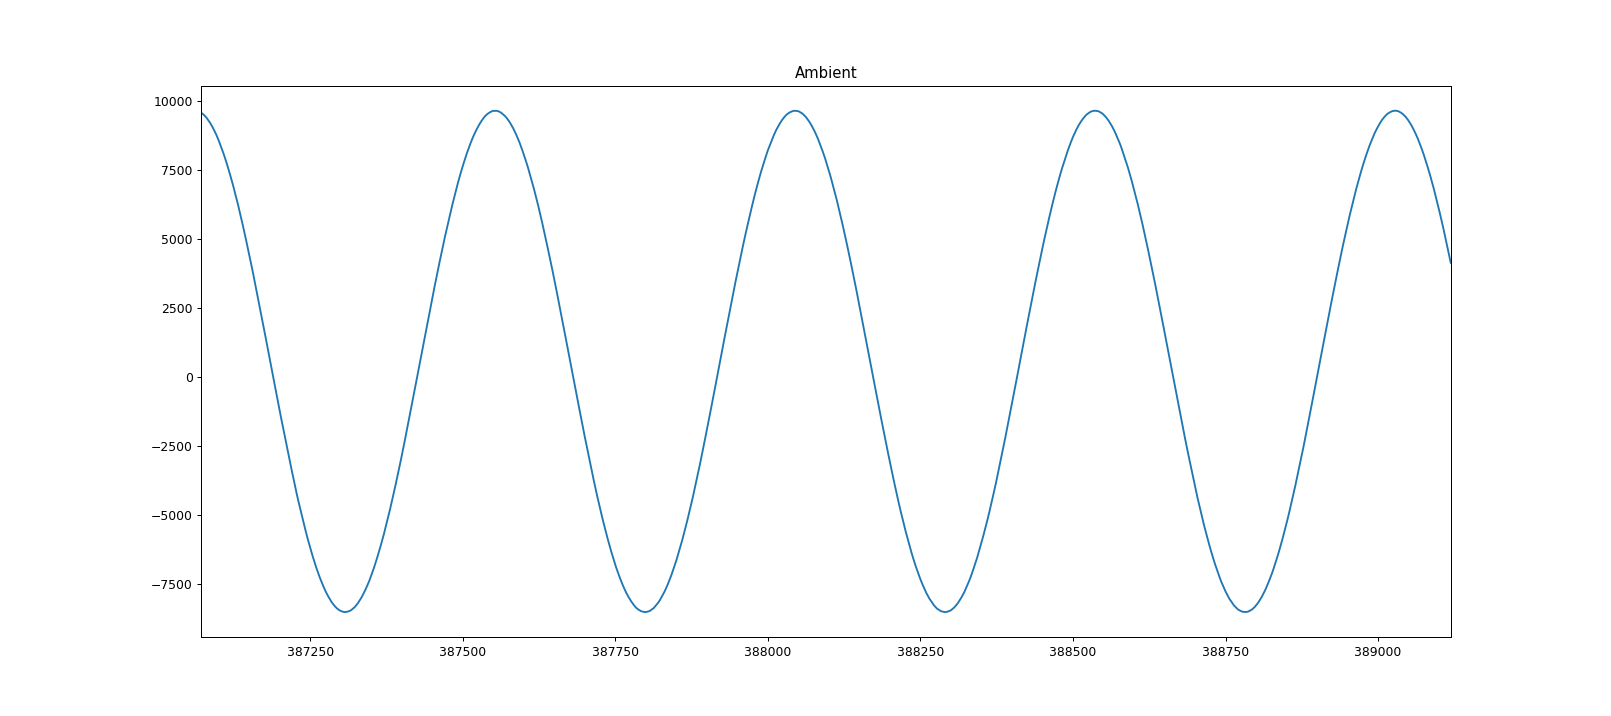

In [13]:
plt.figure()
res.SWF(0,0)["E1"].plot(figsize=(18,8), title="Cold")
plt.figure()
res.SWF(0,189)["E1"].plot(figsize=(18,8),title="Ambient")

# FFT comparaison at F0 

<IPython.core.display.Javascript object>


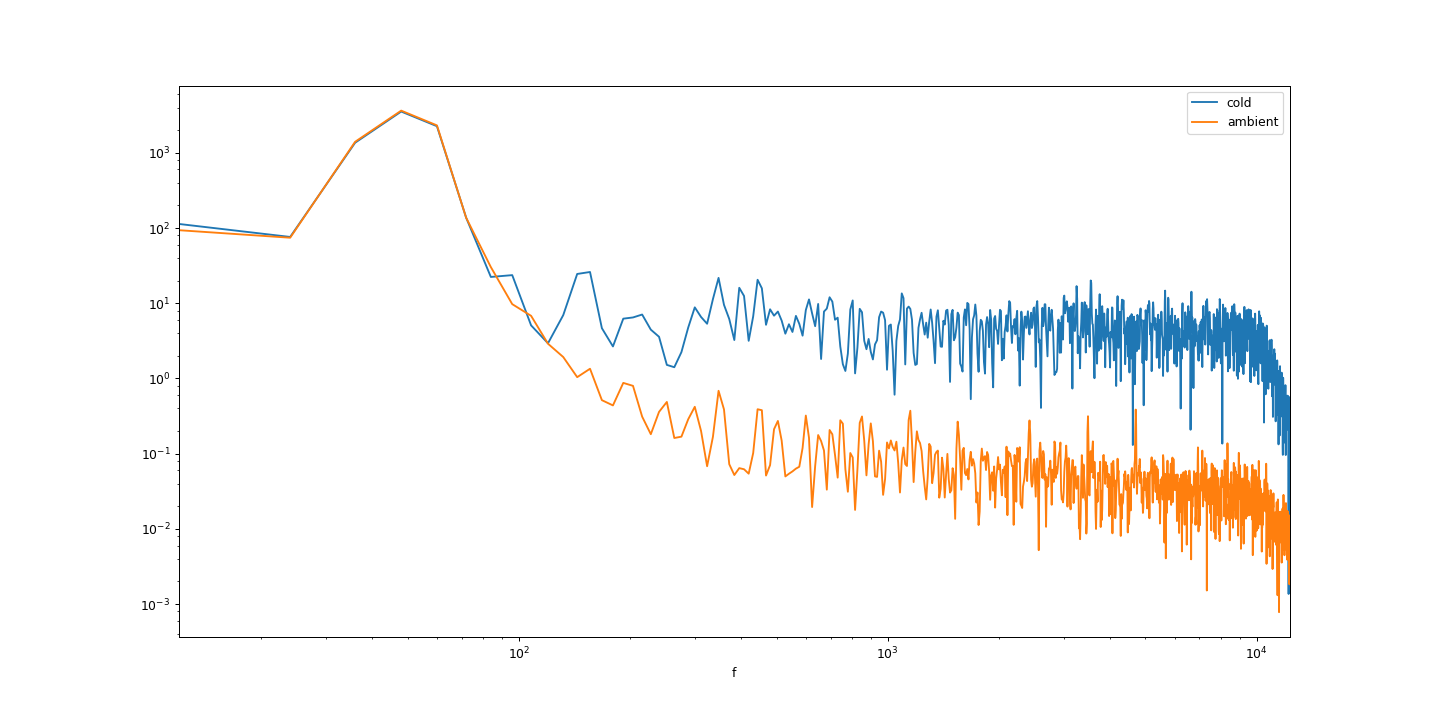

In [42]:
plt.figure()
for case in [(0,"cold"),(189,"ambient")]:
    fft=TF.fft(res.SWF(0,case[0])["E1"],sampling_frequency=24576,window=np.hanning(2048))
    fft=pds.DataFrame(fft)
    fft=fft.set_index("f").drop([0.0])["mod"]
    fft.name=case[1]
    fft.plot()
    plt.loglog()
plt.legend()

# FFT comparaison at F1

<IPython.core.display.Javascript object>


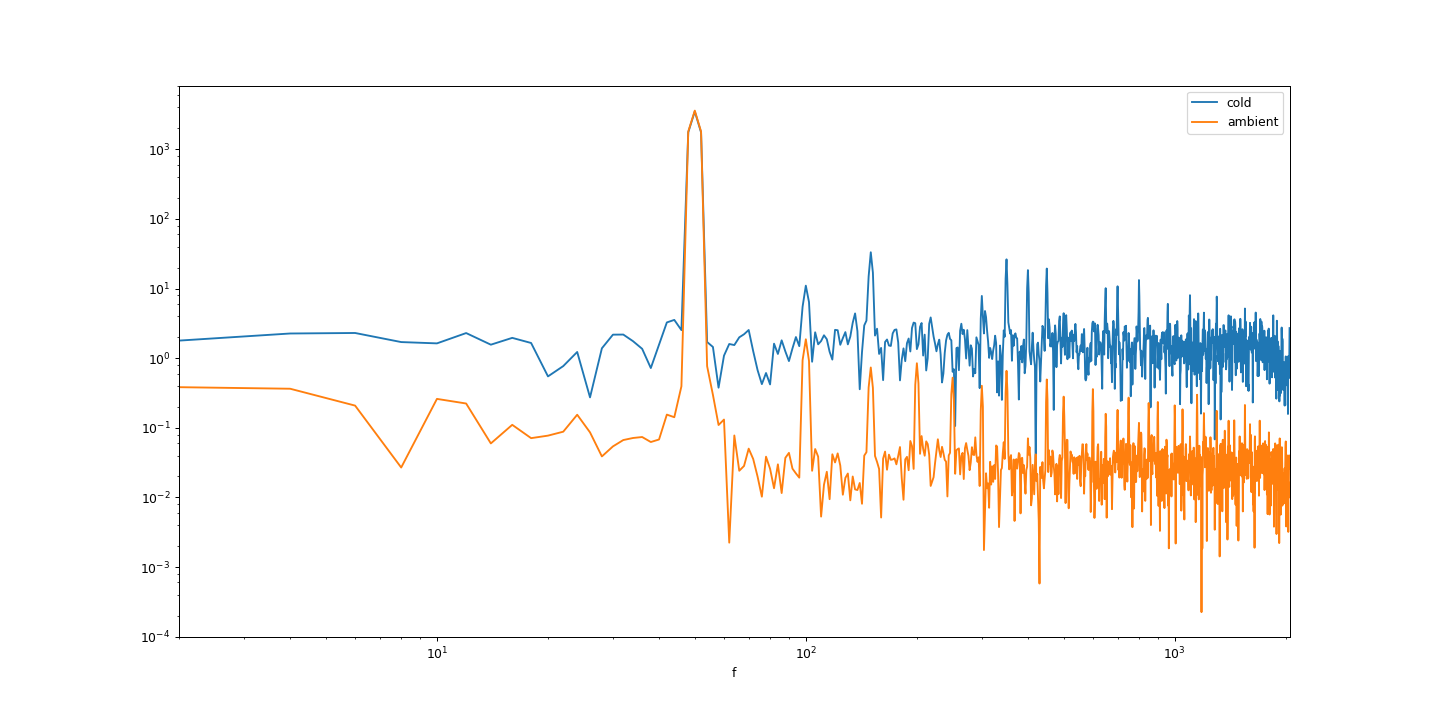

In [45]:
plt.figure()
for case in [(0,"cold"),(189,"ambient")]:
    fft=TF.fft(res.SWF(1,case[0])["E1"],sampling_frequency=4096,window=np.hanning(2048))
    fft=pds.DataFrame(fft)
    fft=fft.set_index("f").drop([0.0])["mod"]
    fft.name=case[1]
    fft.plot()
    plt.loglog()
plt.legend()

# FFT comparaison at F2

<IPython.core.display.Javascript object>


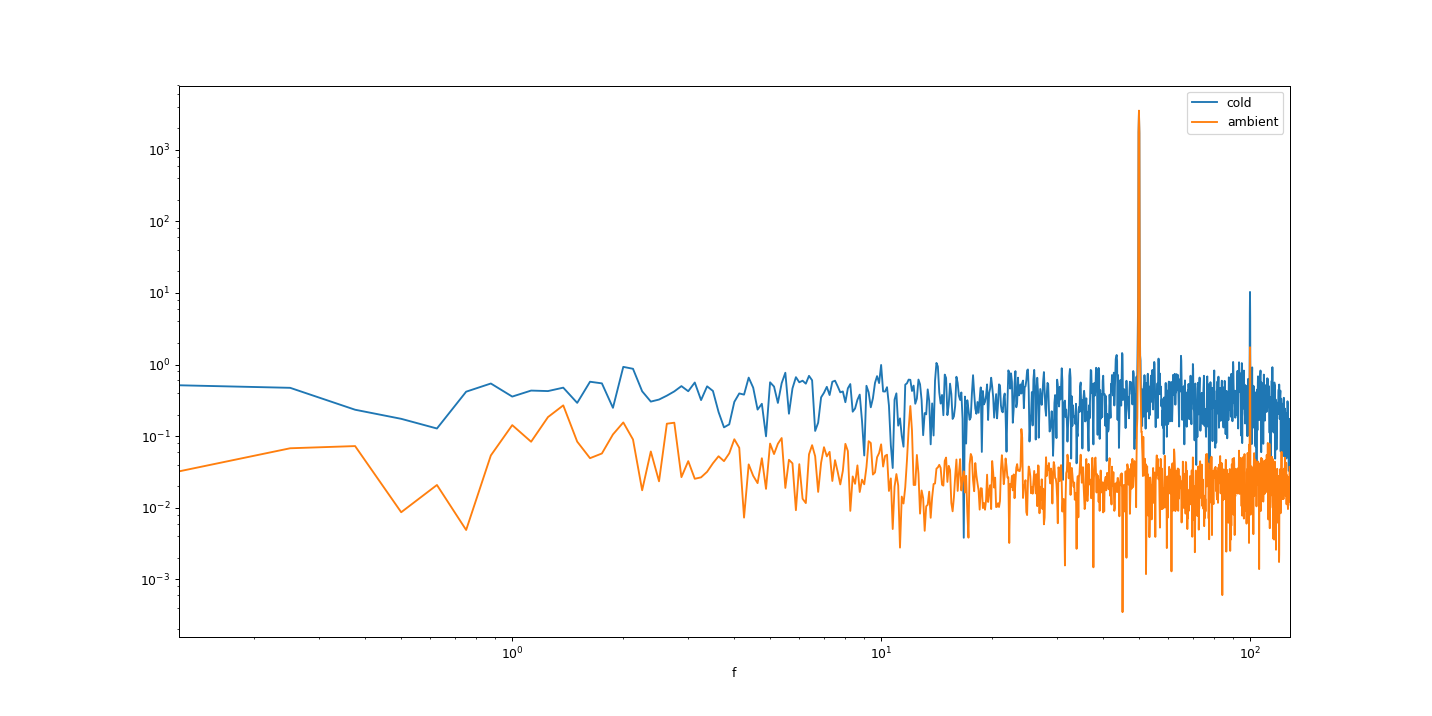

In [46]:
plt.figure()
for case in [(0,"cold"),(189,"ambient")]:
    fft=TF.fft(res.SWF(2,case[0])["E1"],sampling_frequency=256,window=np.hanning(2048))
    fft=pds.DataFrame(fft)
    fft=fft.set_index("f").drop([0.0])["mod"]
    fft.name=case[1]
    fft.plot()
    plt.loglog()
plt.legend()